In [36]:
from pandas_datareader import data as pdr
from datetime import datetime,date
import pandas as pd
import yfinance as yf
yf.pdr_override()


from datetime import datetime
startdate = datetime(2015,1,1)

enddate = date.today()

# data = pd.read_csv("RELIANCE.NS.csv")

df = pdr.get_data_yahoo("ZOMATO.NS", start=startdate, end=enddate)

# dates = pd.to_datetime(data["Date"])
cols = list(df)[:7]
data = df[cols].astype(float)
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290.0
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854.0
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900.0
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731.0
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089.0
...,...,...,...,...,...,...
2023-05-03,63.450001,64.949997,63.150002,63.549999,63.549999,65082316.0
2023-05-04,63.500000,66.599998,63.349998,65.699997,65.699997,123042355.0
2023-05-05,65.500000,66.699997,64.250000,65.400002,65.400002,94016138.0


In [37]:
days = 14


delta = data["Close"].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
average_up = up.ewm(com=(days - 1), adjust=False).mean()
average_down = down.ewm(com=(days - 1), adjust=False).mean()
rs = average_up / average_down


data['RSI'] = 100 - (100 / (1 + rs))

data = data.iloc[days:]

# data = data['RSI']
data = data[1:]
data

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2021-08-13,133.850006,139.750000,132.100006,137.350006,137.350006,33674300.0,83.525373
2021-08-16,136.399994,136.899994,132.250000,134.949997,134.949997,20305361.0,81.596985
2021-08-17,132.800003,134.350006,130.600006,132.500000,132.500000,15815187.0,79.577214
2021-08-18,134.500000,136.800003,133.300003,134.949997,134.949997,22566920.0,80.107490
2021-08-20,134.949997,141.449997,133.000000,139.300003,139.300003,53789580.0,81.048388
...,...,...,...,...,...,...,...
2023-05-03,63.450001,64.949997,63.150002,63.549999,63.549999,65082316.0,75.187099
2023-05-04,63.500000,66.599998,63.349998,65.699997,65.699997,123042355.0,78.442951
2023-05-05,65.500000,66.699997,64.250000,65.400002,65.400002,94016138.0,76.926171


In [38]:
# data = data[['Close',"RSI"]]
data = data[['Close','RSI']]
# dataRs = data
dataRs = data
data

,Close,RSI
Date,,
2021-08-13,137.350006,83.525373
2021-08-16,134.949997,81.596985
2021-08-17,132.500000,79.577214
2021-08-18,134.949997,80.107490
2021-08-20,139.300003,81.048388
...,...,...
2023-05-03,63.549999,75.187099
2023-05-04,65.699997,78.442951
2023-05-05,65.400002,76.926171


In [39]:
data.shape

(429, 2)

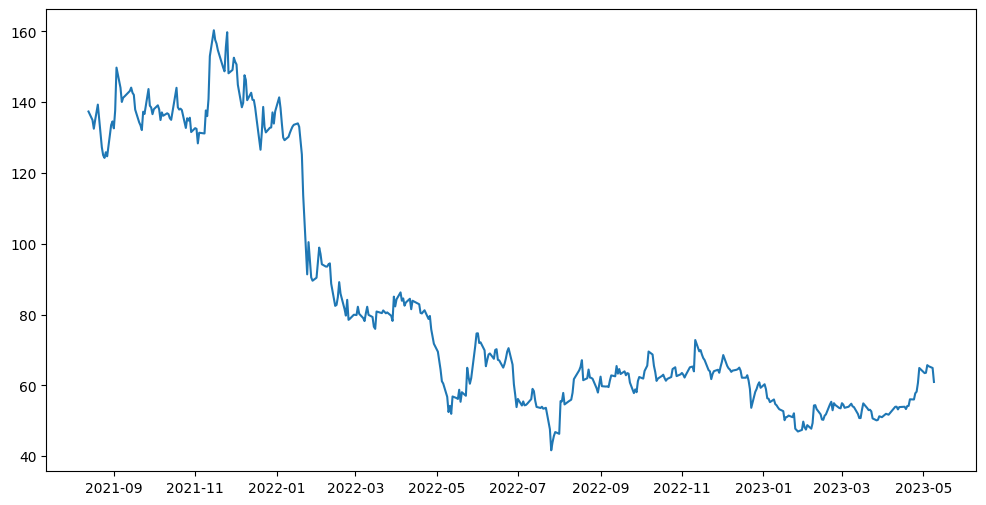

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data["Close"])

In [41]:
import numpy as np


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data = np.array(data)
print(dataRs["Close"][1619])
train_size = int(len(data)*0.80)
train_data,test_data = data[:train_size] ,data[train_size:]

scaler = MinMaxScaler(feature_range=(0,1))
scalerC = MinMaxScaler(feature_range=(0,1))
scalerR = MinMaxScaler(feature_range=(0,1))

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

print(train_data_scaled,test_data_scaled)

scalerC.fit(train_data[:,0].reshape(-1,1))
scalerR.fit(train_data[:,1].reshape(-1,1))

# print(scaler.inverse_transform(df))

IndexError: index 1619 is out of bounds for axis 0 with size 429

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data = np.array(data)

train_size = int(len(data)*0.80)
train_data,test_data = data[:train_size] ,data[train_size:]

scaler = MinMaxScaler(feature_range=(0,1))
scalerC = MinMaxScaler(feature_range=(0,1))
scalerR = MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

print(train_data_scaled,test_data_scaled)

scalerC.fit(train_data[:,0].reshape(-1,1))
scalerR.fit(train_data[:,1].reshape(-1,1))

[[0.80657399 1.        ]
 [0.78634635 0.97151422]
 [0.76569741 0.94167856]
 [0.78634635 0.9495117 ]
 [0.82300885 0.96341046]
 [0.72144962 0.81536737]
 [0.70248628 0.78991216]
 [0.69616517 0.78107307]
 [0.7096502  0.79006483]
 [0.69995781 0.77487831]
 [0.77454699 0.82616198]
 [0.78297514 0.8316463 ]
 [0.76654027 0.80302346]
 [0.80868102 0.83343236]
 [0.91108299 0.8961756 ]
 [0.86304256 0.81506613]
 [0.82932996 0.76109625]
 [0.83944372 0.76898217]
 [0.84239362 0.77140625]
 [0.85545715 0.78263425]
 [0.863464   0.78975727]
 [0.85124308 0.76439015]
 [0.84618626 0.75348679]
 [0.81120936 0.6792006 ]
 [0.7808681  0.61923915]
 [0.77370412 0.60522768]
 [0.7623262  0.58230042]
 [0.80615255 0.64960289]
 [0.80067418 0.63765892]
 [0.86009266 0.72026546]
 [0.82048038 0.63517755]
 [0.81626631 0.62638851]
 [0.80025287 0.59219998]
 [0.81205223 0.61210843]
 [0.82132325 0.62802734]
 [0.8116308  0.60423301]
 [0.78634635 0.54391082]
 [0.80446695 0.58072245]
 [0.7964601  0.56082149]
 [0.80235991 0.57380252]


MinMaxScaler()

In [44]:
def CreateDataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps])
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)
    
    

In [45]:
time_steps = 50

train_x,train_y = CreateDataset(train_data_scaled,time_steps)
test_x,test_y = CreateDataset(test_data_scaled,time_steps)


In [46]:
train_x.shape[2],train_y.shape

(2, (292,))

In [47]:
# train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
# test_x  = test_x.reshape((test_x.shape[0],test_x.shape[1],1))

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import load_model




In [49]:

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10600     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,051
Trainable params: 51,051
Non-trainable params: 0
_________________________________________________________________


In [51]:
train_x.shape,train_y.shape

((292, 50, 2), (292,))

In [52]:
model.fit(train_x,train_y,validation_data=(train_x,train_y),epochs=100,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 8s 146ms/step - loss: 0.0719 - val_loss: 0.0279
Epoch 2/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0190 - val_loss: 0.0089
Epoch 3/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0097 - val_loss: 0.0058
Epoch 4/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 5/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0068 - val_loss: 0.0046
Epoch 6/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 7/100
19/19 [==============================] - 2s 85ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 8/100
19/19 [==============================] - 2s 85ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 9/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 10/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0047 - val_loss: 0.003

19/19 [==============================] - 2s 84ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 83/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 84/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 85/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 86/100
19/19 [==============================] - 2s 87ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 87/100
19/19 [==============================] - 2s 87ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 88/100
19/19 [==============================] - 2s 88ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 89/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 90/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0019 - val_loss: 9.8583e-04
Epoch 91/100
19/19 [==============================] - 2s 83ms/step - loss: 0.0016 - val_loss: 0.0010

In [27]:
predict = model.predict(test_x)
# predictR = RSI.predict(test_Rx)
print(1-np.square(predict-test_y).mean())
# print(1-np.square(predictR-test_Ry).mean())

2/2 [==============================] - 0s 28ms/step
0.943268770595266


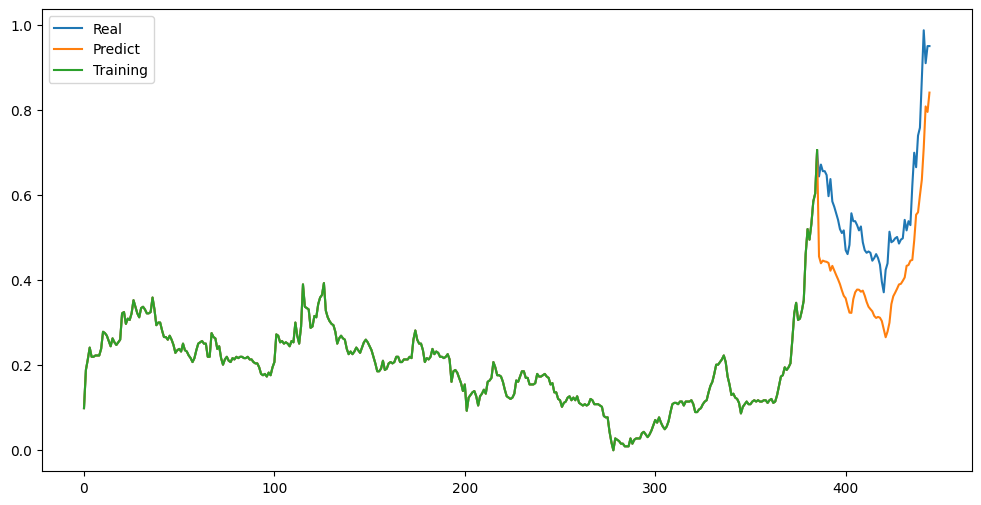

In [30]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,predict))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])

In [32]:
test_data[0],train_data[-1]

(array([33.54999924, 92.56204383]), array([31.79999924, 90.80076956]))

In [33]:
import pandas as pd
dataR = dataRs[:train_size]
del dataR["RSI"]
lists = np.array(train_x[-1]).reshape(1,test_x.shape[1],test_x.shape[2])
preds=[]

l=[]
for i in range(len(test_x)-1):
    print(i)
#     print(preds)
    pred = model.predict(lists[i].reshape(1,time_steps,2))
#     [[1,2,3],[2,3,4],[5,6,7]]


    df = pd.DataFrame({'Close' : [scalerC.inverse_transform(pred)]})
    dataR = pd.concat([dataR,df],ignore_index = True)
#     print(dataR)
    
    delta = dataR["Close"].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    average_up = up.ewm(com=(days - 1), adjust=False).mean()
    average_down = down.ewm(com=(days - 1), adjust=False).mean()
    rs = average_up / average_down
    RSI = 100 - (100 / (1 + rs))


    
    rsi = list(RSI)[-1]

#     print(scalerC.inverse_transform(pred),rsi)
    
#     print(pred.reshape(1,2))

    pred = np.append(pred,scalerR.transform(np.array([rsi]).reshape(1, -1)))
    l = np.vstack([lists[i],pred])
    preds.append(pred[0])
    l = l[1:]
    lists = np.vstack([lists,l.reshape(1,time_steps,2)])
#     
print(preds)
print(lists)

0
1/1 [==============================] - 0s 171ms/step
1
1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 37ms/step
3
1/1 [==============================] - 0s 40ms/step
4
1/1 [==============================] - 0s 34ms/step
5
1/1 [==============================] - 0s 35ms/step
6
1/1 [==============================] - 0s 37ms/step
7
1/1 [==============================] - 0s 35ms/step
8
1/1 [==============================] - 0s 38ms/step
9
1/1 [==============================] - 0s 40ms/step
10
1/1 [==============================] - 0s 44ms/step
11
1/1 [==============================] - 0s 52ms/step
12
1/1 [==============================] - 0s 43ms/step
13
1/1 [==============================] - 0s 48ms/step
14
1/1 [==============================] - 0s 53ms/step
15
1/1 [==============================] - 0s 47ms/step
16
1/1 [==============================] - 0s 43ms/step
17
1/1 [==============================] - 0s 39ms/step
18
1/1 [===========

In [34]:
preds = np.array(preds)

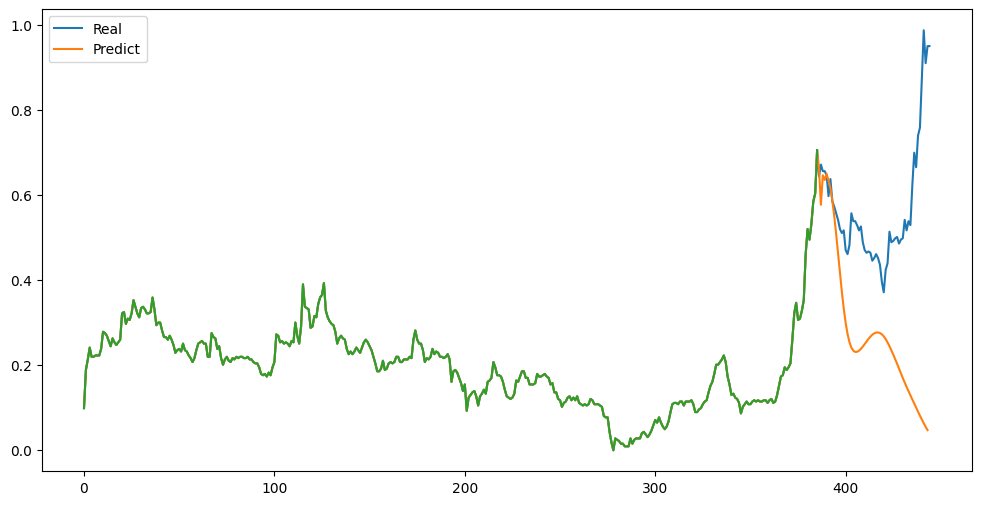

In [35]:
plt.figure(figsize=(12,6))
# plt.plot(data["Close"])
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,preds))
plt.plot(train_y)
plt.legend(["Real",'Predict'])

In [53]:
model.save('my_model_2.h5')

In [ ]:
btw the percent of bois liking u is increased to 85 no cap from servey of 4 week and today 